# Multi Class Classifier

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, precision_score, recall_score, classification_report, make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

In [3]:
from sklearn.datasets import fetch_openml

import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.install_opener(
    urllib.request.build_opener(
        urllib.request.HTTPSHandler(context=ssl._create_default_https_context())
    )
)

X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)

print(X.shape, y.shape)

(70000, 784) (70000,)


In [15]:
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
clf = Perceptron(random_state=1972)

In [17]:
y_train_ovr = LabelBinarizer().fit_transform(y_train)
for i in range(10):
    print('{0}:{1}'.format(y_train[i], y_train_ovr[i]))

5:[0 0 0 0 0 1 0 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
9:[0 0 0 0 0 0 0 0 0 1]
2:[0 0 1 0 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]


In [18]:
clf.fit(X_train, y_train)

Perceptron(random_state=1972)

In [19]:
print('Shape of weight matrix: ', clf.coef_.shape)
print('Bias', clf.intercept_.shape)

Shape of weight matrix:  (10, 784)
Bias (10,)


In [20]:
scores = clf.decision_function(X_train[6].reshape(1, -1))
print(scores)
print('The predicted class: ', np.argmax(scores))

[[-32689945.   8306314.  -4072642.  -3419547. -12741194.  -2066391.
   -9412216. -10411422.  -7186835. -10546966.]]
The predicted class:  1


In [21]:
y_hat = clf.predict(X_train)

In [23]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5923
           1       0.95      0.96      0.95      6742
           2       0.80      0.95      0.87      5958
           3       0.93      0.78      0.85      6131
           4       0.94      0.89      0.91      5842
           5       0.64      0.94      0.76      5421
           6       0.98      0.85      0.91      5918
           7       0.94      0.91      0.93      6265
           8       0.88      0.73      0.80      5851
           9       0.89      0.84      0.87      5949

    accuracy                           0.88     60000
   macro avg       0.89      0.88      0.88     60000
weighted avg       0.90      0.88      0.88     60000



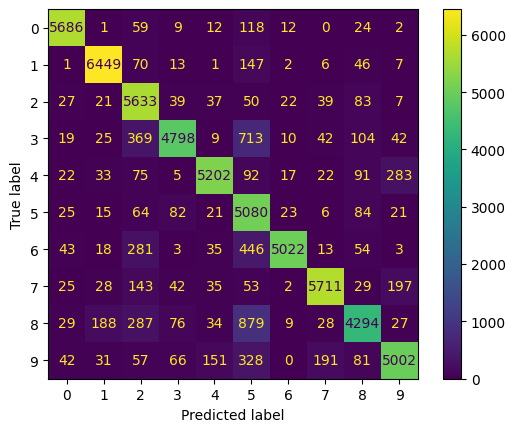

In [24]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_hat, values_format='.5g')

### Making a pipline

In [26]:
estimators = [('std_scaler', MinMaxScaler()), ('bin_clf', Perceptron())]
pipe = Pipeline(estimators)
